In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'c:/Users/HP/Downloads/archive (12)/Mall_Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()
    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:

# Check for missing values
df.isnull().sum()
    

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:

# EDA: Basic statistics and distribution plots
df.describe()
    

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


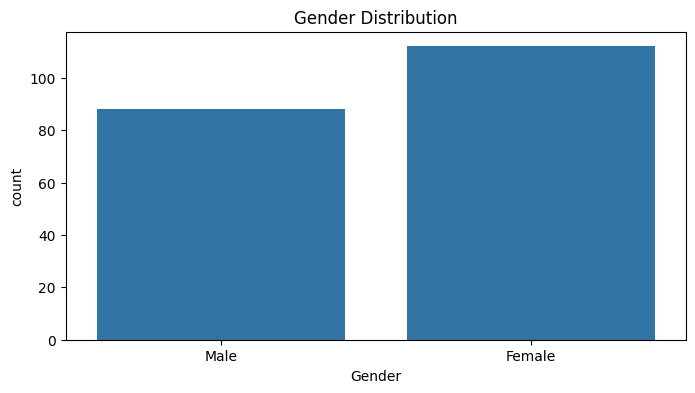

In [4]:

# Gender distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()
    

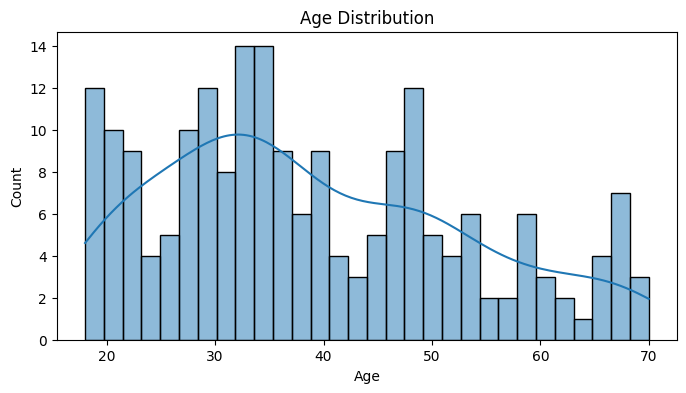

In [5]:

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()
    

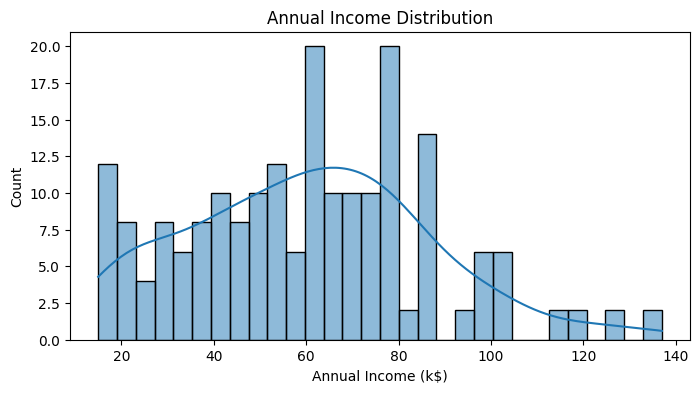

In [6]:

# Annual Income distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()
    

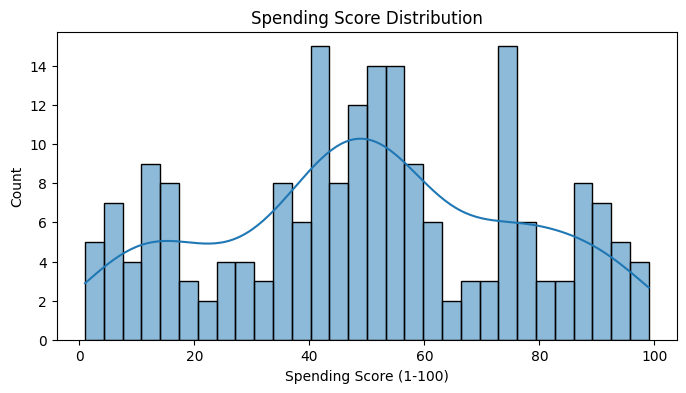

In [7]:

# Spending Score distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.show()
    

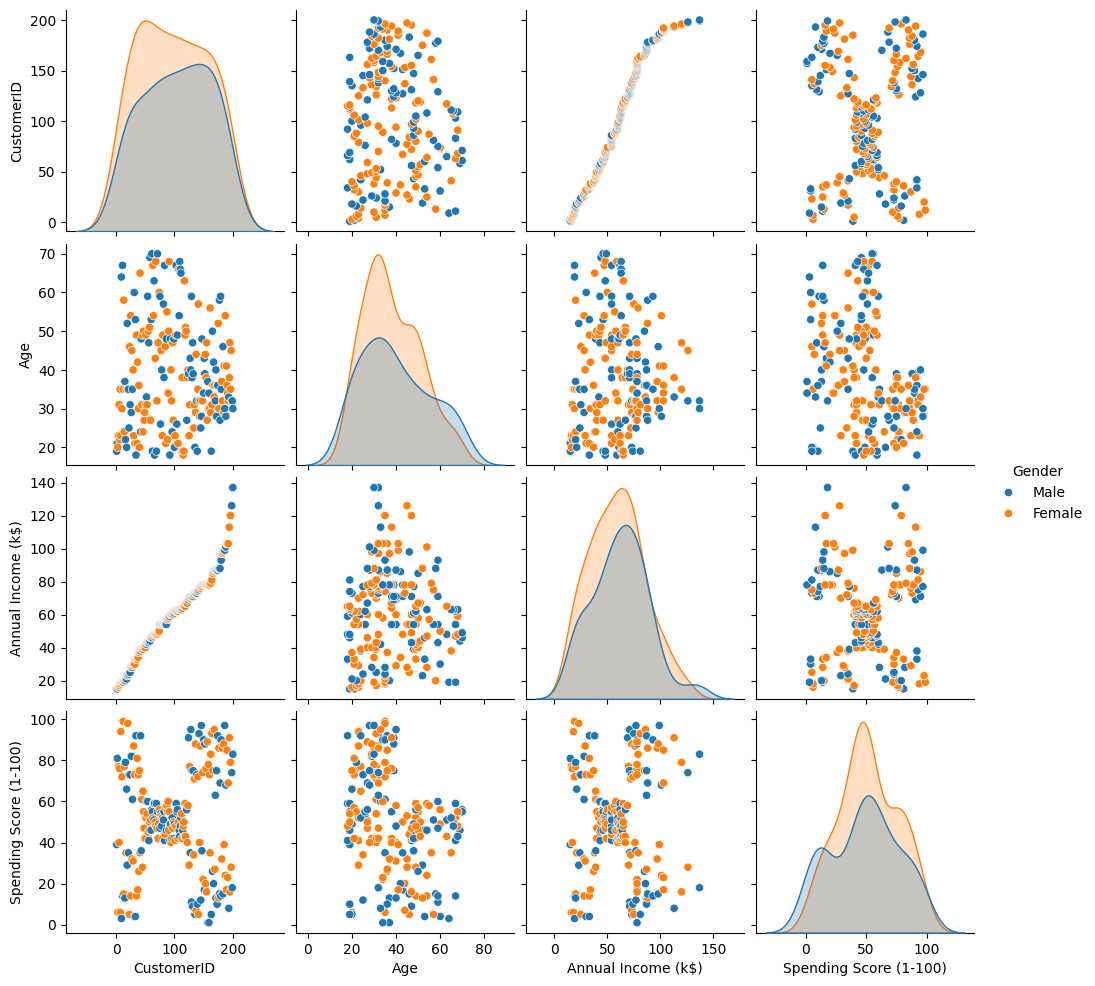

In [8]:

# Pairplot to see relationships between numerical features
sns.pairplot(df, hue='Gender')
plt.show()
    

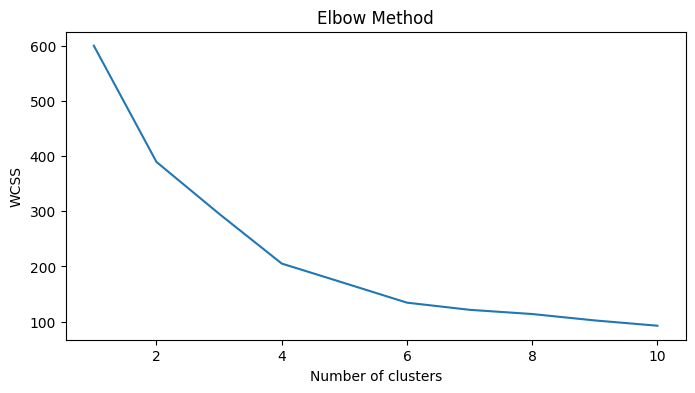

In [10]:

# K-means Clustering
# Select features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

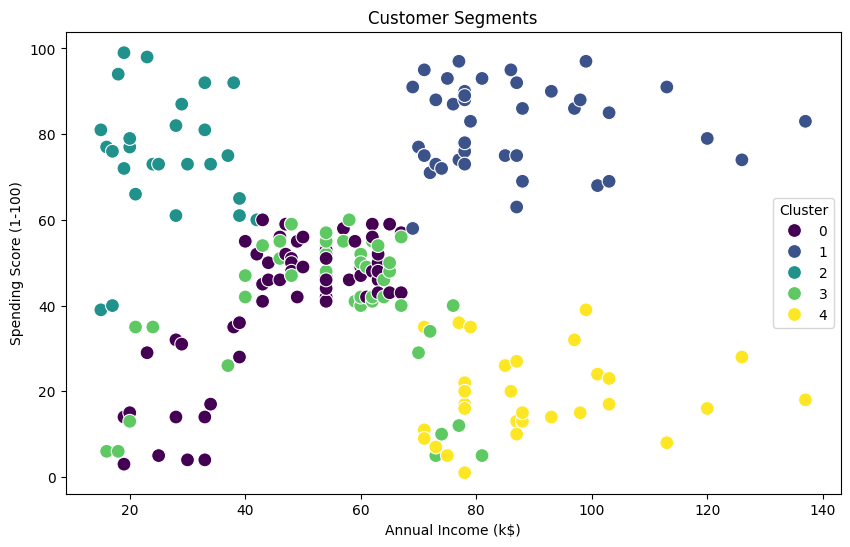

In [11]:

# From the Elbow graph, we can choose the optimal number of clusters
# Here, we choose n_clusters = 5 for demonstration purposes
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments')
plt.show()
    

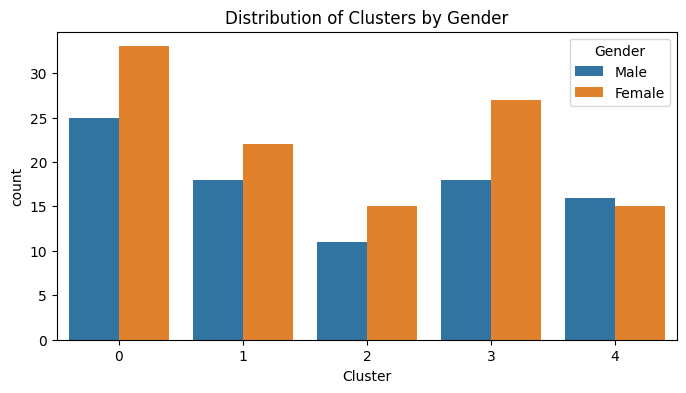

In [12]:

# Distribution of clusters by gender
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Cluster', hue='Gender')
plt.title('Distribution of Clusters by Gender')
plt.show()
    

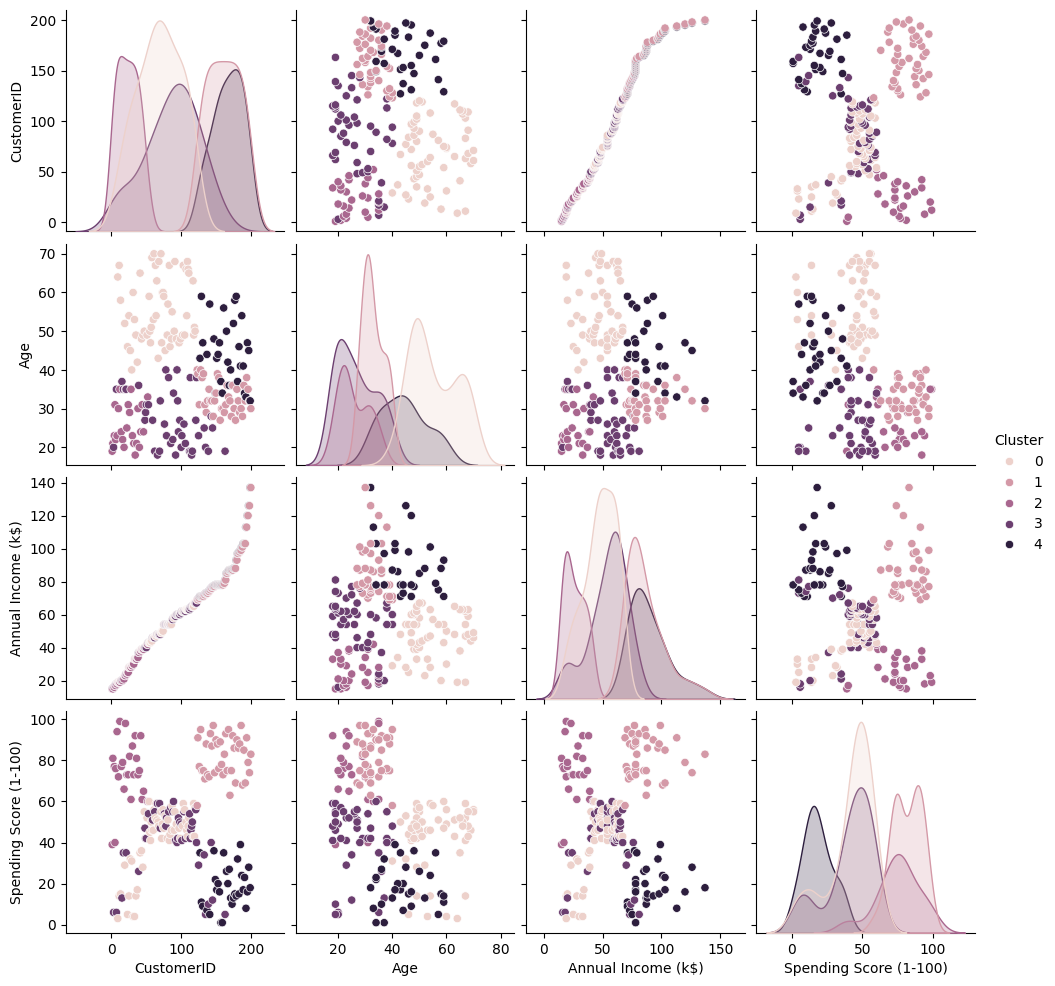

In [13]:

# Pairplot by cluster
sns.pairplot(df, hue='Cluster')
plt.show()
    

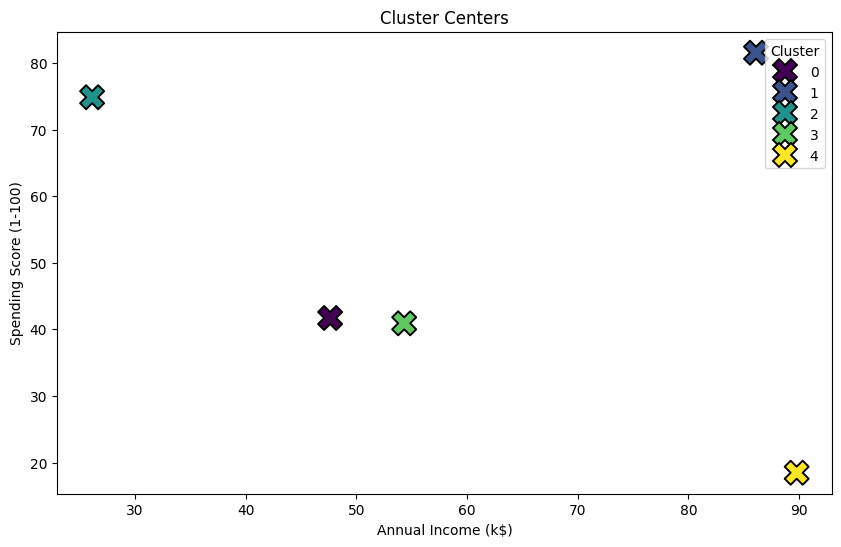

In [14]:

# Cluster centers visualization
plt.figure(figsize=(10,6))
centers = scaler.inverse_transform(kmeans.cluster_centers_)
center_df = pd.DataFrame(centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
center_df['Cluster'] = center_df.index

sns.scatterplot(data=center_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=300, marker='X', edgecolor='black')
plt.title('Cluster Centers')
plt.show()
    

In [17]:

# Save the results to a CSV file
df.to_csv('Mall_Customers_Segmented.csv', index=False)

df.head()
    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
